In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('/content/Loan_dataset.csv')

# Drop ID if not needed
df = df.drop('Loan_ID', axis=1)

# Initialize encoder
le = LabelEncoder()

# Encode specified columns
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Check result
print(df.head())
print(df.info())

# Save output
df.to_csv('/content/Loan_dataset.csv', index=False)

KeyError: "['Loan_ID'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Load data
df = pd.read_csv('/content/Loan_dataset.csv')

# Drop Loan_ID if exists
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

# Fix 'Dependents' column if it exists
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Encode categorical columns
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


D.t


Decision Tree Execution Time: 0.0054 seconds


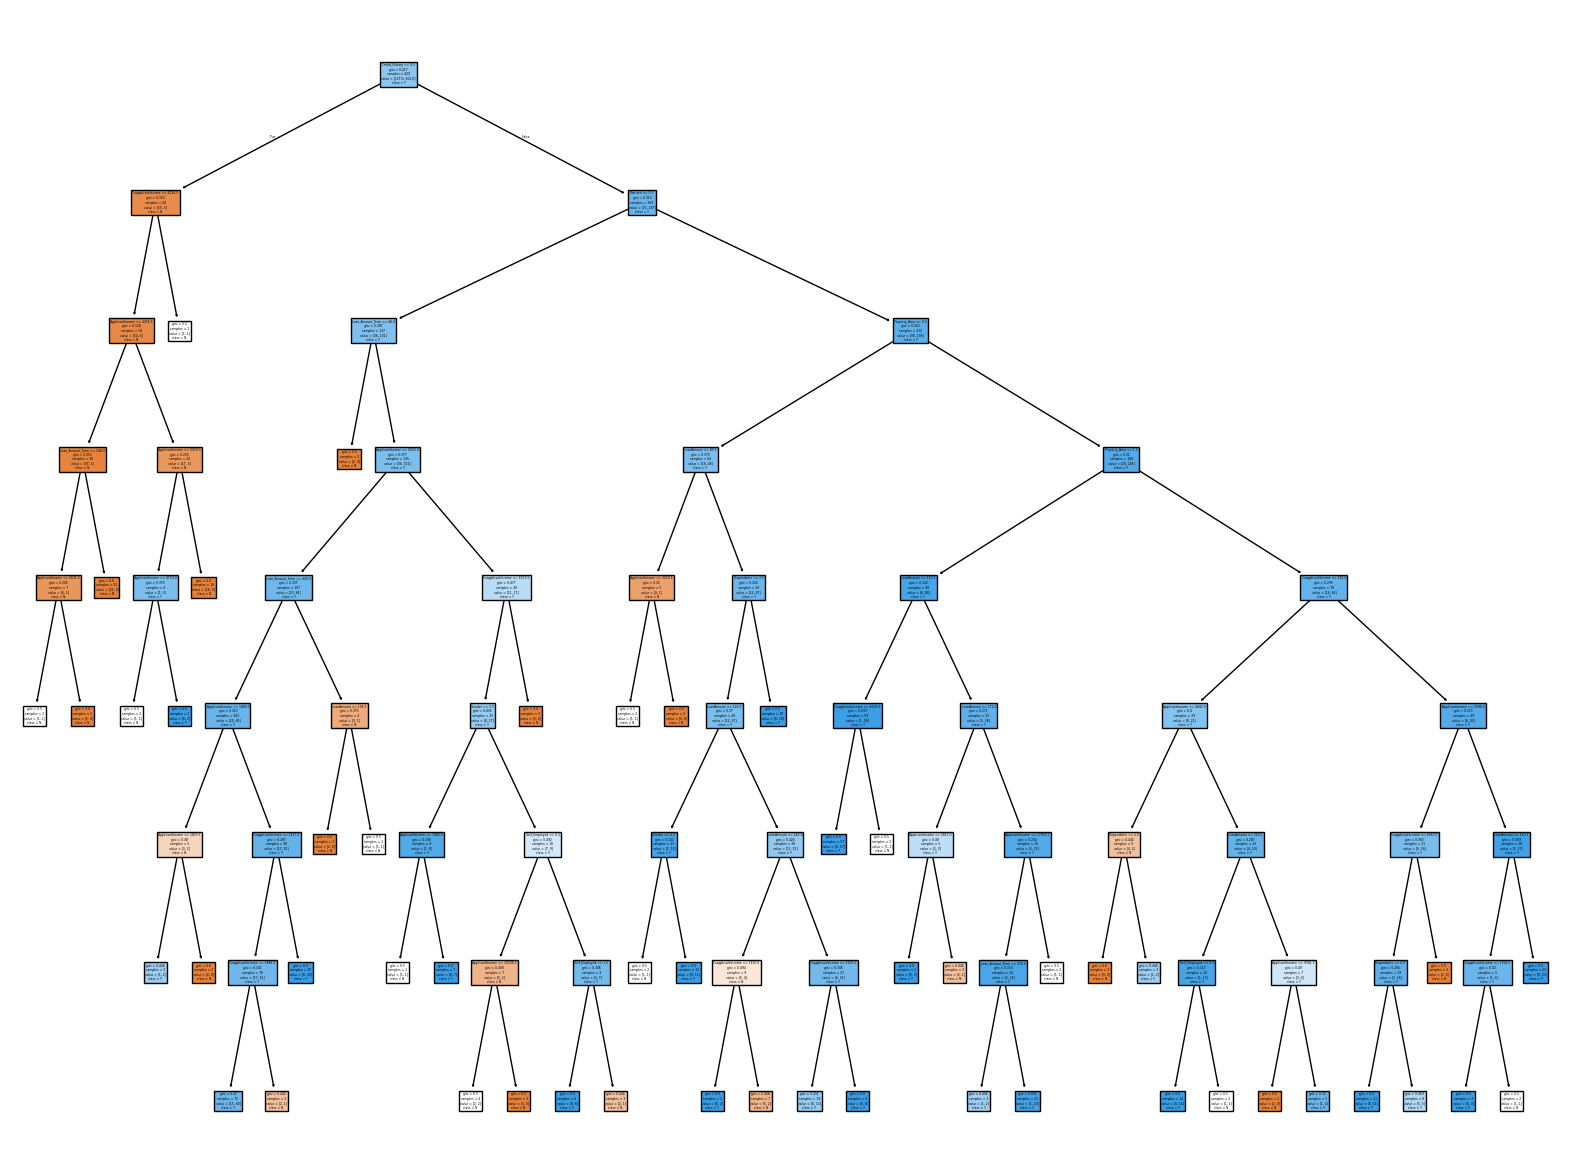

Confusion Matrix:
[[27 38]
 [30 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.42      0.44        65
           1       0.70      0.75      0.73       120

    accuracy                           0.63       185
   macro avg       0.59      0.58      0.58       185
weighted avg       0.62      0.63      0.63       185


Accuracy Score:
0.6324324324324324


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time

# Load your dataset
df = pd.read_csv('/content/Loan_dataset.csv')

# Drop Loan_ID if it exists
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

# Fix 'Dependents'
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Encode categorical columns
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Separate features & target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Track time: Start
start_time = time.time()

# Improved Decision Tree
clf = DecisionTreeClassifier(
    criterion='gini',     # Try 'gini' instead of 'entropy'
    max_depth=8,          # Allow deeper splits
    min_samples_split=4,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples per leaf
    random_state=42
)

# Train the model
clf.fit(X_train, y_train)

# Track time: End
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"\nDecision Tree Execution Time: {execution_time:.4f} seconds")

# Visualize the tree
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=X.columns, class_names=['N', 'Y'], filled=True)
plt.show()

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import time

# Load your dataset
df = pd.read_csv('Loan_dataset.csv')

# Drop Loan_ID if it exists
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

# Fix 'Dependents'
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Encode categorical columns
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Separate features & target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Track time: Start
start_time = time.time()

# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Track time: End
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"\nRandom Forest Execution Time: {execution_time:.4f} seconds")

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Random Forest Execution Time: 0.2239 seconds
Confusion Matrix:
[[ 31  34]
 [  8 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.48      0.60        65
           1       0.77      0.93      0.84       120

    accuracy                           0.77       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.78      0.77      0.76       185


Accuracy Score:
0.772972972972973
